In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv('logs/invoice_def/analizar.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'invoice_def/analizar.csv'

In [61]:
columns_to_convert = [
    'image_weight', 'text_weight', 'Precision', 
    'Generalizacion', 'Simplicidad', 'Silhoutte', 
    'Davies_Bould', 'Calinski_harab', 'New%'
]

for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '.').astype(float)

In [62]:
df.dtypes

#                   object
model_type          object
clustering_type     object
labeling            object
image_weight       float64
text_weight        float64
use_pca               bool
n_components        object
New%               float64
PathNotDisc%         int64
Fitness              int64
Precision          float64
Generalizacion     float64
Simplicidad        float64
Silhoutte          float64
Davies_Bould       float64
Calinski_harab     float64
Observaciones      float64
dtype: object

In [101]:
df.to_csv('gpt.csv', sep=';', index=False)

In [70]:
# Generar el reporte de perfil
perfil = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# O para guardar el reporte como un archivo HTML
perfil.to_file("reporte_df.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

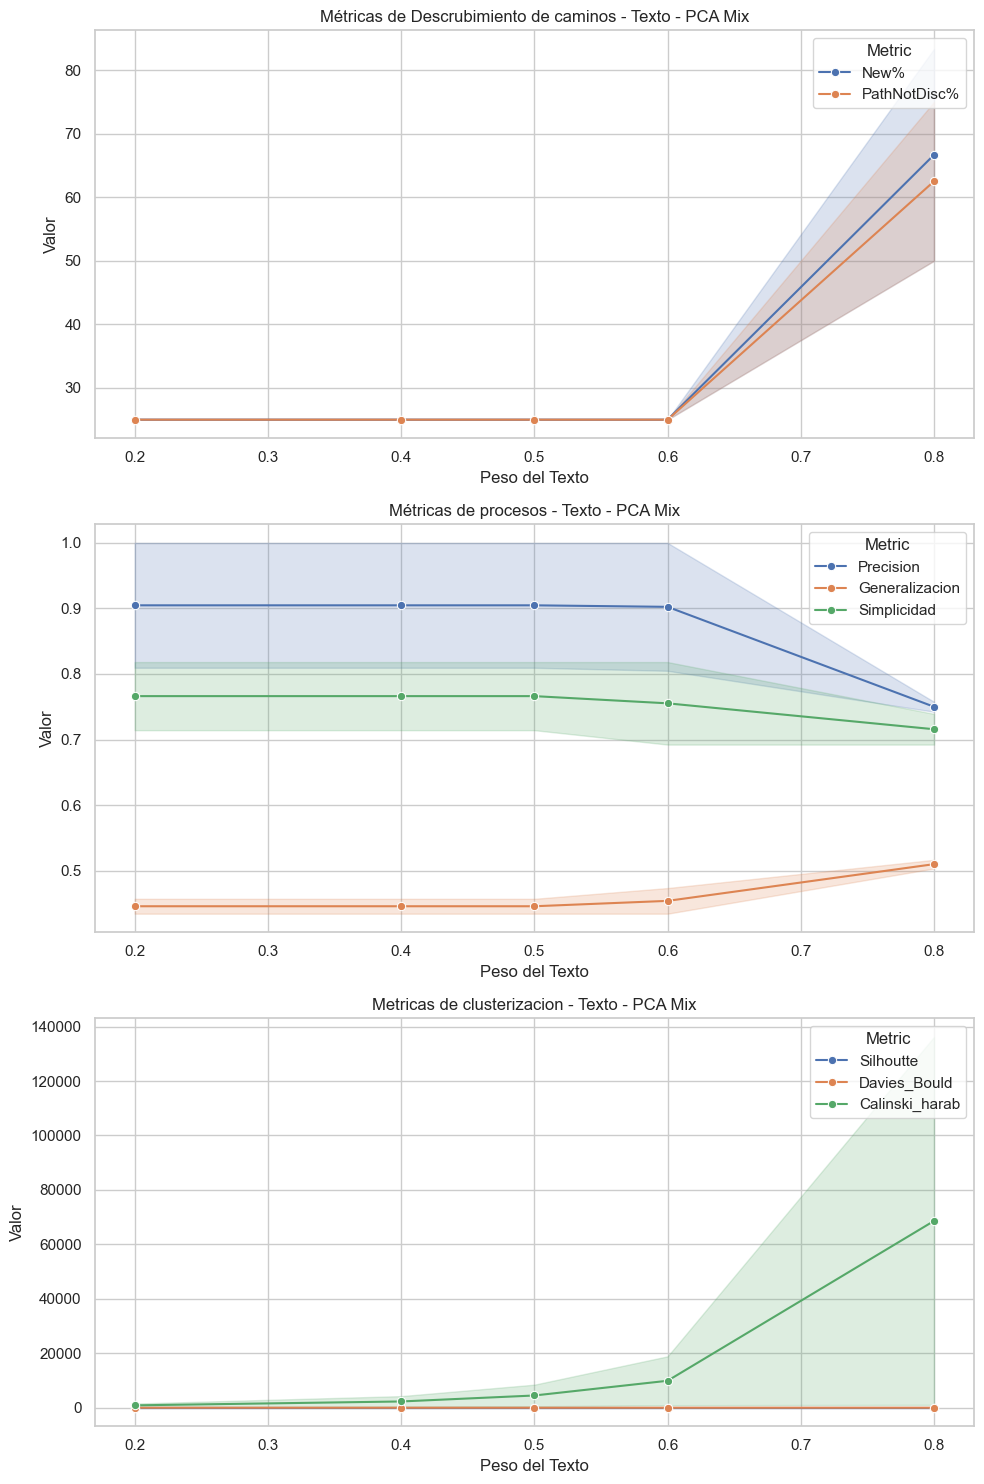

In [100]:
metrics_new_pathnotdisc = ['New%', 'PathNotDisc%']
metrics_precision_gen_simp = ['Precision', 'Generalizacion', 'Simplicidad']
metrics_clustering = ['Silhoutte', 'Davies_Bould', 'Calinski_harab']

data_for_plot1 = df[['text_weight'] + metrics_new_pathnotdisc].melt(id_vars='text_weight', var_name='Metric', value_name='Value')
data_for_plot2 = df[['text_weight'] + metrics_precision_gen_simp].melt(id_vars='text_weight', var_name='Metric', value_name='Value')
data_for_plot3 = df[['text_weight'] + metrics_clustering].melt(id_vars='text_weight', var_name='Metric', value_name='Value')

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.lineplot(ax=axes[0], data=data_for_plot1, x='text_weight', y='Value', hue='Metric', marker='o')
axes[0].set_title('Métricas de Descrubimiento de caminos - Texto - PCA Mix')
axes[0].set_xlabel('Peso del Texto')
axes[0].set_ylabel('Valor')

sns.lineplot(ax=axes[1], data=data_for_plot2, x='text_weight', y='Value', hue='Metric', marker='o')
axes[1].set_title('Métricas de procesos - Texto - PCA Mix')
axes[1].set_xlabel('Peso del Texto')
axes[1].set_ylabel('Valor')

sns.lineplot(ax=axes[2], data=data_for_plot3, x='text_weight', y='Value', hue='Metric', marker='o')
axes[2].set_title('Metricas de clusterizacion - Texto - PCA Mix')
axes[2].set_xlabel('Peso del Texto')
axes[2].set_ylabel('Valor')

plt.tight_layout()
plt.show()


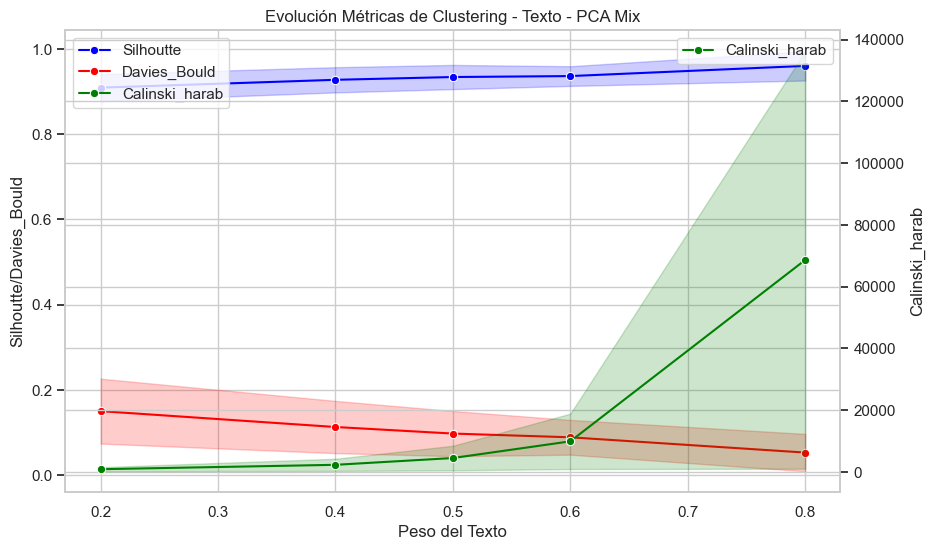

In [102]:
sns.set_theme(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()

sns.lineplot(ax=ax1, data=df, x='text_weight', y='Silhoutte', color='blue', marker='o', label='Silhoutte')
sns.lineplot(ax=ax1, data=df, x='text_weight', y='Davies_Bould', color='red', marker='o', label='Davies_Bould')

sns.lineplot(ax=ax2, data=df, x='text_weight', y='Calinski_harab', color='green', marker='o', label='Calinski_harab')

ax1.set_title('Evolución Métricas de Clustering - Texto - PCA Mix')
ax1.set_xlabel('Peso del Texto')
ax1.set_ylabel('Silhoutte/Davies_Bould')
ax2.set_ylabel('Calinski_harab')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

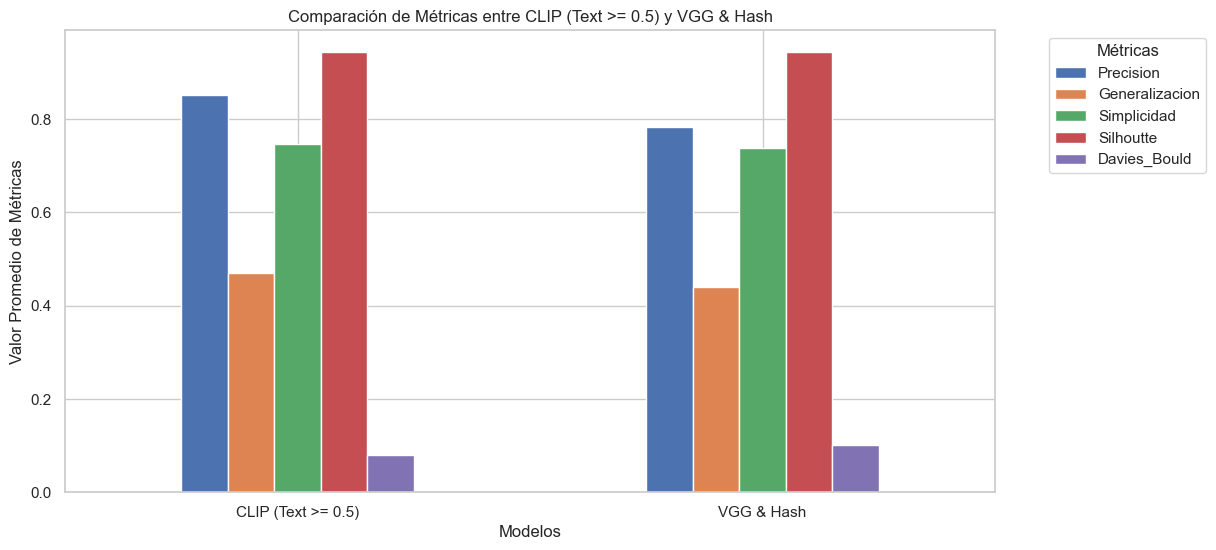

In [92]:
clip_high_text = df[(df['model_type'] == 'CLIP') & (df['text_weight'] >= 0.5)]
vgg_hash = df[df['model_type'].isin(['VGG', 'Hash'])]

clip_high_text_means = clip_high_text[['Precision', 'Generalizacion', 'Simplicidad','Silhoutte','Davies_Bould']].mean()
vgg_hash_means = vgg_hash[['Precision', 'Generalizacion', 'Simplicidad','Silhoutte', 'Davies_Bould']].mean()

comparison_df = pd.DataFrame({'CLIP (Text >= 0.5)': clip_high_text_means,
                              'VGG & Hash': vgg_hash_means})

comparison_df = comparison_df.T

fig, ax = plt.subplots(figsize=(12, 6))
comparison_df.plot(kind='bar', ax=ax)
ax.set_title('Comparación de Métricas entre CLIP (Text >= 0.5) y VGG & Hash')
ax.set_ylabel('Valor Promedio de Métricas')
ax.set_xlabel('Modelos')
ax.legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


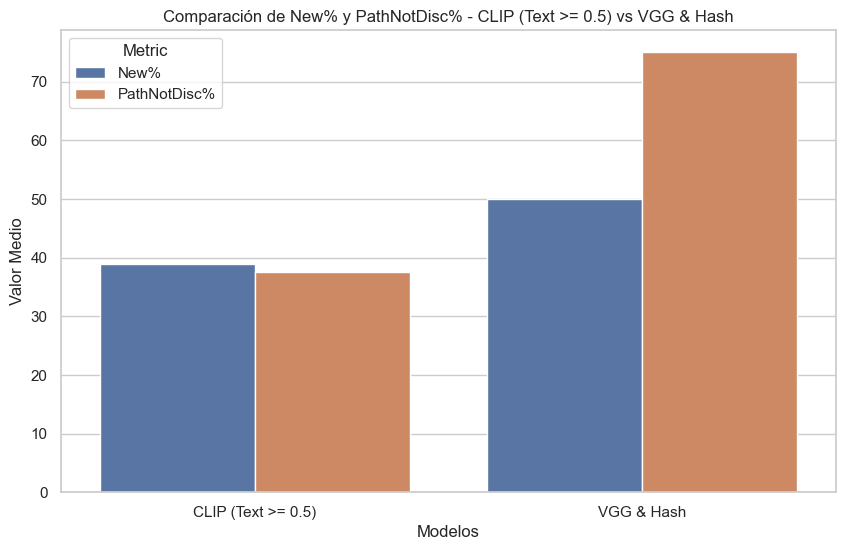

In [96]:
means_df = pd.DataFrame({
    'Model': ['CLIP (Text >= 0.5)', 'VGG & Hash'],
    'New%': [clip_high_text_means['New%'], vgg_hash_means['New%']],
    'PathNotDisc%': [clip_high_text_means['PathNotDisc%'], vgg_hash_means['PathNotDisc%']]
})

long_df = pd.melt(means_df, id_vars='Model', value_vars=['New%', 'PathNotDisc%'], var_name='Metric', value_name='Mean')

plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='Model', y='Mean', hue='Metric')
plt.title('Comparación de New% y PathNotDisc% - CLIP (Text >= 0.5) vs VGG & Hash')
plt.ylabel('Valor Medio')
plt.xlabel('Modelos')
plt.show()

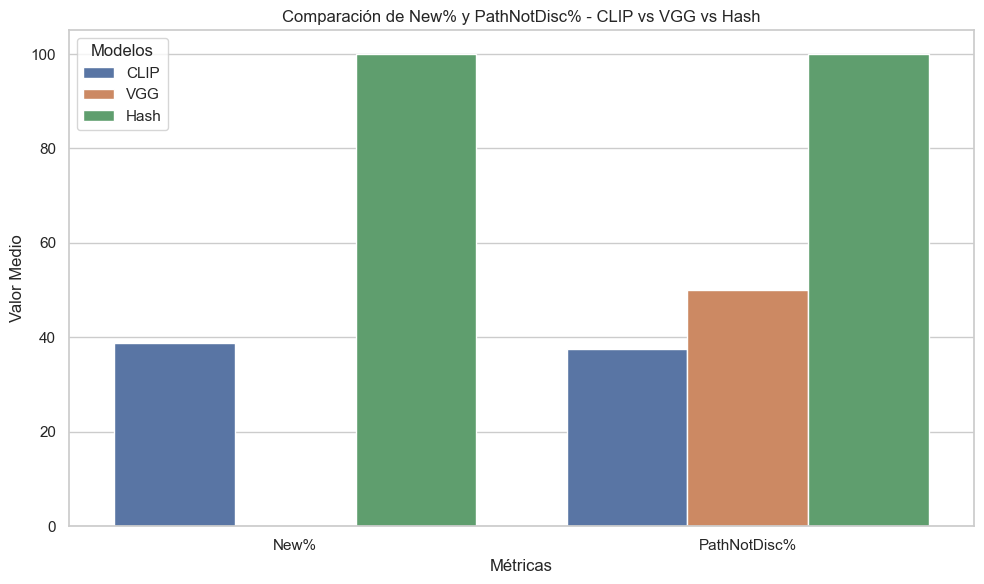

In [99]:
clip = df[(df['model_type'] == 'CLIP') & (df['text_weight'] >= 0.5)]

vgg = df[df['model_type'] == 'VGG']

hash_models = df[df['model_type'] == 'Hash']

clip_means = clip[['New%', 'PathNotDisc%']].mean()
vgg_means = vgg[['New%', 'PathNotDisc%']].mean()
hash_means = hash_models[['New%', 'PathNotDisc%']].mean()

means_df = pd.DataFrame({
    'Model': ['CLIP', 'VGG', 'Hash'],
    'New%': [clip_means['New%'], vgg_means['New%'], hash_means['New%']],
    'PathNotDisc%': [clip_means['PathNotDisc%'], vgg_means['PathNotDisc%'], hash_means['PathNotDisc%']]
})

long_df = pd.melt(means_df, id_vars='Model', value_vars=['New%', 'PathNotDisc%'], var_name='Metric', value_name='Mean')

plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='Metric', y='Mean', hue='Model')
plt.title('Comparación de New% y PathNotDisc% - CLIP vs VGG vs Hash')
plt.ylabel('Valor Medio')
plt.xlabel('Métricas')
plt.legend(title='Modelos')
plt.tight_layout()
plt.show()
